In [1]:
pip install cvxpy

Looking in indexes: https://pypi.org/simple, https://us-python.pkg.dev/colab-wheels/public/simple/


In [2]:
import numpy as np
import cvxpy as cp
import matplotlib.pyplot as plt
from late_reporting_time_series_data import *

In [3]:
y_hat = cp.Variable(N)
l = cp.Variable(N-1)

In [4]:
objective = cp.Minimize(cp.sum_squares(cp.diff(y_hat, 2)))

In [5]:
constraints = [y_tilde[0] == y_hat[0] - l[0]]

for t in range(1, N-1):
  constraints += [y_tilde[t] == y_hat[t] - l[t] + l[t-1]]

constraints += [y_tilde[N-1] == y_hat[N-1] + l[N-2]]
constraints += [np.ones(N-1).T @ l <= 0.1*(np.ones(N)@y_hat)]

In [6]:
problem = cp.Problem(objective, constraints)
result = problem.solve(solver='SCS')

In [7]:
print(result)

3.027293724145501e-08


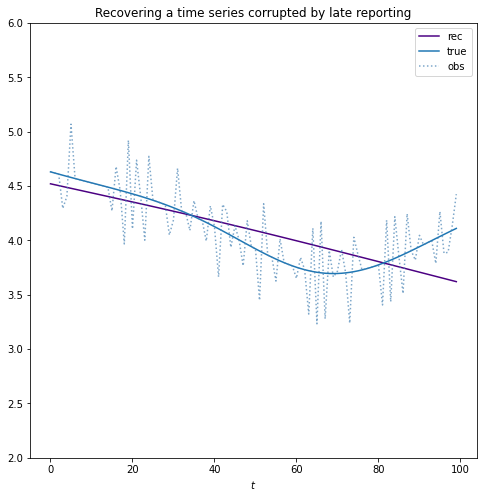

In [8]:
plot_helper(y_hat.value)

We can clearly see that the RMS error of $\|\hat{y}-y\|_{2} / \sqrt{T}$ < $\|\tilde{y}-y\|_{2} / \sqrt{T}$ which implies that we have recovered the original time series to some degree.

In [9]:
cp.pnorm((y_hat.value-y_true), 2).value / np.sqrt(N)

0.17504422143647952

In [10]:
cp.pnorm((y_tilde-y_true), 2).value / np.sqrt(N)

0.22802597773474947